In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
file ='C:\\Data Science\\my-ds-projects\\Insurance-Kaggle\\insurance.csv'


In [2]:
df=pd.read_csv(file)
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
266,40,male,19.80,1,yes,southeast,17179.52200
921,62,female,33.20,0,no,southwest,13462.52000
746,34,male,27.00,2,no,southwest,11737.84884
262,52,male,24.32,3,yes,northeast,24869.83680
1043,28,female,25.80,0,no,southwest,3161.45400


In [3]:
print(df.shape)
print(df.isnull().sum())

(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45


In [5]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [9]:
np.sqrt(df.children).skew()

0.11634977314652259

Detect Outliers

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)


df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64 age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64
age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [6]:
df_out.shape

(1193, 7)

<AxesSubplot:xlabel='sex', ylabel='charges'>

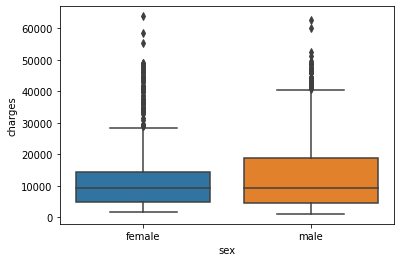

In [99]:
sns.boxplot(x=df.sex, y=df.charges, data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

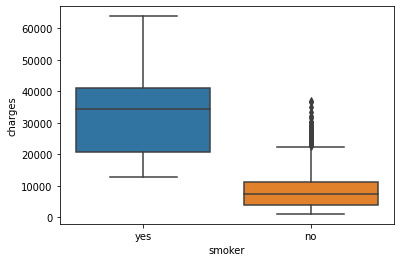

In [100]:
sns.boxplot(x=df.smoker, y=df.charges)

<AxesSubplot:xlabel='region', ylabel='charges'>

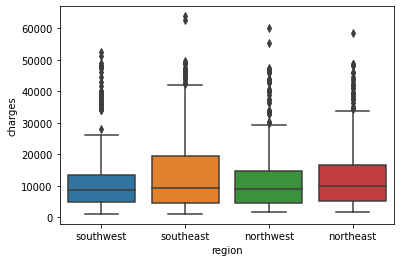

In [101]:
sns.boxplot(x=df.region, y=df.charges)

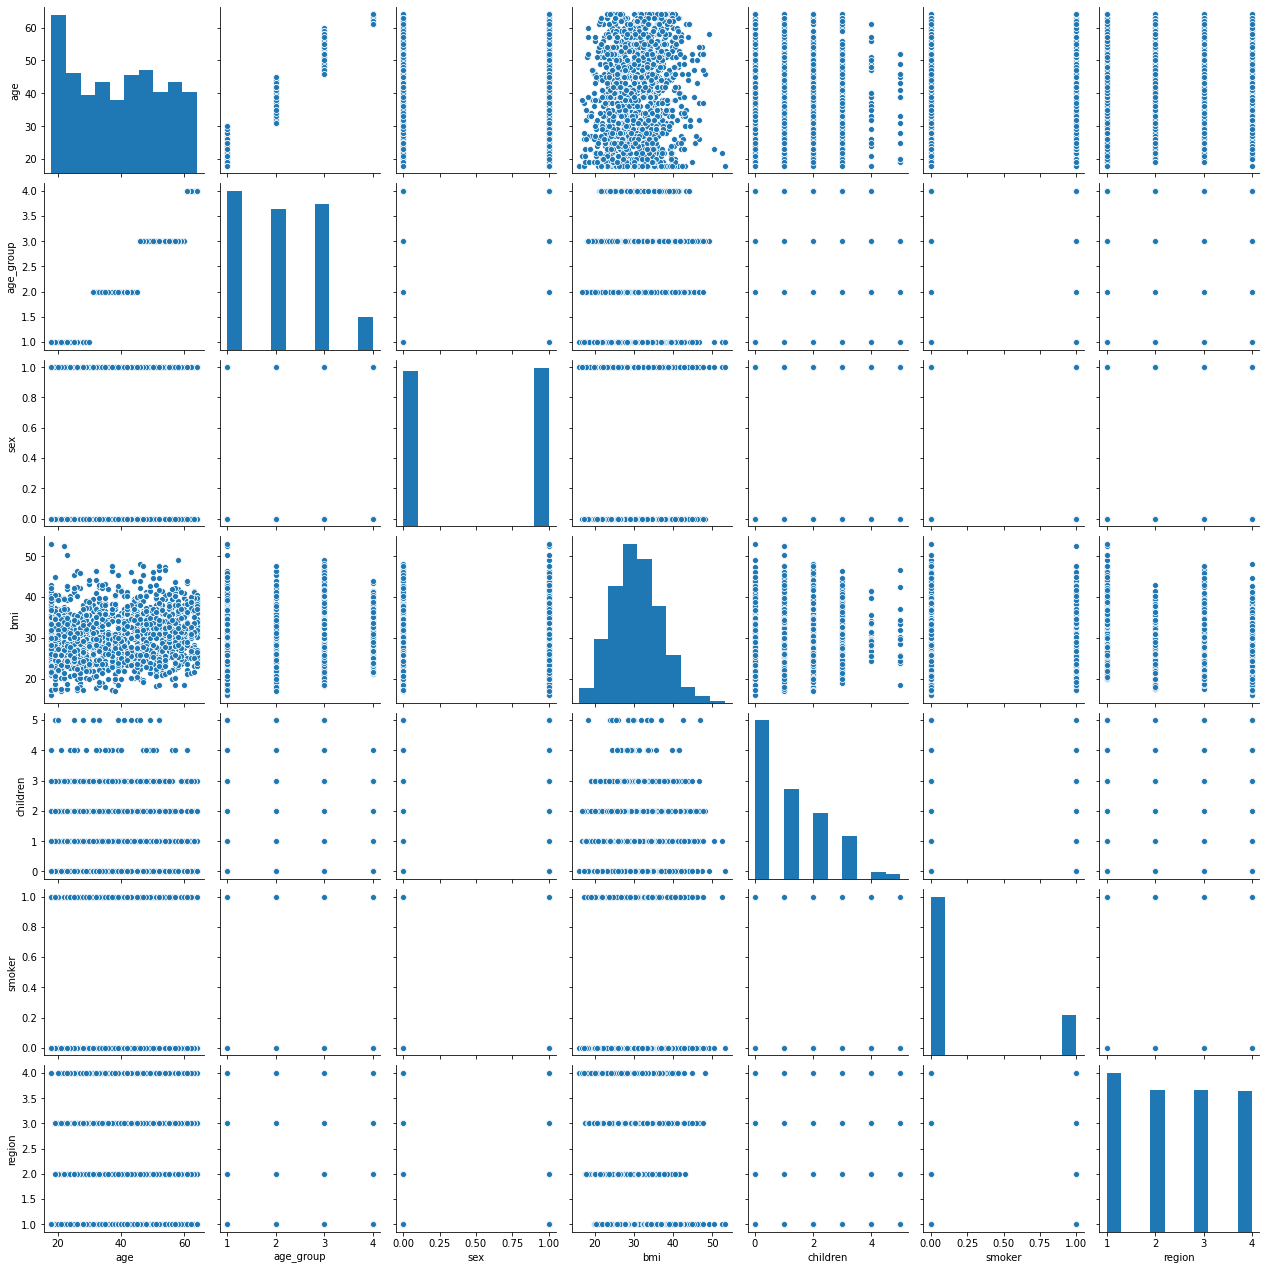

In [160]:
sns.pairplot(data=df)

In [111]:
df[df.age == df.age.max()]

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.700,1,no,northwest,30166.61817
94,64,female,31.300,2,yes,southwest,47291.05500
199,64,female,39.330,0,no,northeast,14901.51670
328,64,female,33.800,1,yes,southwest,47928.03000
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
398,64,male,25.600,2,no,southwest,14988.43200
402,64,female,32.965,0,no,northwest,14692.66935
418,64,male,39.160,1,no,southeast,14418.28040
420,64,male,33.880,0,yes,southeast,46889.26120


In [120]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [121]:
df.sex.replace(to_replace=['male', 'female'], value=[1,0], inplace=True)
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)
df.region.replace(to_replace=['southeast', 'northwest', 'southwest', 'northeast'], value=[1,2,3,4], inplace=True)


In [122]:
df.sample(3)

,age,age_group,sex,bmi,children,smoker,region,charges
370,61,4,0,21.090,0,0,2,13415.03810
1232,54,3,0,24.605,3,0,2,12479.70895
1044,55,3,1,35.245,1,0,4,11394.06555


In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [311]:
y=df.charges.values
df.drop(columns=['charges'], inplace=True)
X1=df[['age', 'bmi', 'smoker', 'children']].values


##### Multiple Linear Regression

In [360]:
X_train, X_test, y_train, y_test=train_test_split(X1,y, test_size=0.2, random_state=42)
lm=LinearRegression()
lm.fit(X_train, y_train)
yhat=lm.predict(X_test)
print(r2_score(y_test, yhat))
math.sqrt(mean_squared_error(y_test, yhat))

0.7811147722517887


5829.378521780666

##### Trying Polynomial Regression

In [362]:
p=PolynomialFeatures(degree=3)
train_x_poly=p.fit_transform(X_train)
test_x_poly=p.fit_transform(X_test)

lm.fit(train_x_poly, y_train)
yhat=lm.predict(test_x_poly)
print(r2_score(y_test, yhat))
import math
math.sqrt(mean_squared_error(y_test, yhat))

0.8690550878819101


4508.7727267667

##### Applying RandomForestRegression

In [357]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators = 59, max_depth=5, random_state=0)
rfr.fit(X_train, y_train)
yhat=rfr.predict(X_test)
print(r2_score(y_test, yhat))
math.sqrt(mean_squared_error(y_test, yhat))

0.8716010735526275


4464.725126573875

<AxesSubplot:>

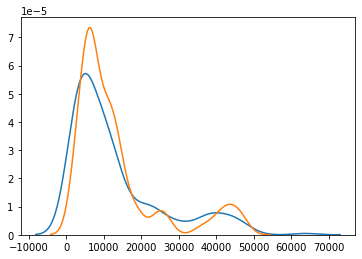

In [358]:
ax1=sns.distplot(y_test, hist=False)
sns.distplot(yhat, hist=False, ax=ax1)

##### Binning Age and checking

In [185]:
age_df=pd.cut(df.age, bins=[15,30, 45, 60, 75], labels=[1,2, 3, 4])
bmi_df=pd.cut(df.bmi, bins=[10, 25, 40, 55], labels=[1,2, 3])
#df.insert(1,'age_group',age_df )
df.insert(1,'bmi_group',bmi_df )

In [186]:
df.sample(3)

,age,bmi_group,age_group,sex,bmi,children,smoker,region
688,47,1,3,0,24.100,1,0,3
47,28,2,1,0,34.770,0,0,2
1113,28,2,1,0,26.315,3,0,2


<AxesSubplot:xlabel='age_group', ylabel='charges'>

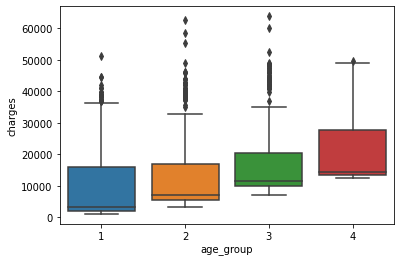

In [119]:
sns.boxplot('age_group', 'charges', data=df)

In [ ]:
X=df[['age_group','sex','bmi','smoker']].values

In [183]:
df.bmi.max()

53.13